# Importing Libraries

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso , LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts in January 2023.
The purpose of this issue is to predict the number of taxi drivers in different zones, so I first need to choose appropriate features and metrics. 

In [3]:
parquet_file = pq.read_table(r'C:\Users\Administrator\Desktop\RahnamaCollege\yellow_tripdata_2023-01.parquet')
df = parquet_file.to_pandas()
df.to_csv('output.csv', index=False)
location=pd.read_csv(r"C:\Users\Administrator\Downloads\taxi+_zone_lookup.csv")

In [4]:
dataset=df.copy()

# Reading Dataset 

In [5]:
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [129]:
dataset.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'weekdays',
       'month', 'hour_start', 'hour_end', 'trip_duration',
       'trip_duration_seconds', 'trip_duration_minutes', 'start_loc',
       'end_loc', 'days'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3066766.0,1.730215,1.0,1.0,2.0,2.0,2.0,0.443848
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164,2008-12-31 23:01:42,2023-01-09 16:21:57.250000,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427874,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,2995023.0,1.362532,0.0,1.0,1.0,1.0,9.0,0.89612
trip_distance,3066766.0,3.847342,0.0,1.06,1.8,3.33,258928.15,249.583756
RatecodeID,2995023.0,1.49744,1.0,1.0,1.0,1.0,99.0,6.474767
PULocationID,3066766.0,166.398046,1.0,132.0,162.0,234.0,265.0,64.244131
DOLocationID,3066766.0,164.392631,1.0,114.0,162.0,234.0,265.0,69.943682
payment_type,3066766.0,1.194483,0.0,1.0,1.0,1.0,4.0,0.529476
fare_amount,3066766.0,18.367069,-900.0,8.6,12.8,20.5,1160.1,17.807822


# Exploratory Data Analysis

In [8]:
# i want to analysis just the 2023 dataset
dataset=dataset[dataset["tpep_pickup_datetime"]>'2023']

In [9]:
# check the null values
dataset.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71742
trip_distance                0
RatecodeID               71742
store_and_fwd_flag       71742
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71742
airport_fee              71742
dtype: int64

## Feature Extraction for time

In [12]:
dataset['weekdays'] = dataset['tpep_pickup_datetime'].dt.day_name()

In [13]:
dataset["month"]=dataset['tpep_pickup_datetime'].dt.month

In [14]:
dataset.month.value_counts()

month
1    2994955
2         10
Name: count, dtype: int64

In [15]:
dataset=dataset.loc[dataset["month"]==1] # January

In [76]:
dataset["days"]=dataset['tpep_pickup_datetime'].dt.day 

I want to know the hours of passengers were taken to understand the most and least hours to pick up. 

In [16]:
dataset["hour_start"]=dataset['tpep_pickup_datetime'].dt.hour
dataset["hour_end"]=dataset['tpep_dropoff_datetime'].dt.hour

I wanted to know the trip duration, so I calculated the difference time of drop and pickup as a trip duration. It could help me find outlier trips, such as 0 duration.Some trip durations are wrong or unnumbered, so I added this feature to sort this column and find negative and zero minutes.

In [17]:
dataset['trip_duration'] = dataset['tpep_dropoff_datetime'] - dataset['tpep_pickup_datetime']

In [18]:
dataset['trip_duration_seconds'] = dataset['trip_duration'].dt.total_seconds()

In [19]:
dataset['trip_duration_minutes'] = dataset['trip_duration'].dt.total_seconds()/60

In [ ]:
dataset.sort_values(by="trip_duration_minutes" , ascending=True).head(10)

I found the zone file dataset on the website, and I want to map the real zone instead of numbers to know more about the locations. 

In [24]:
dataset["start_loc"]=dataset["PULocationID"].map(location.set_index("LocationID")["Zone"])
dataset["end_loc"]=dataset["DOLocationID"].map(location.set_index("LocationID")["Zone"])

##  Data Cleaning 

The number of missing values for the passenger count feature is high because the rider filled this item, so they forgot to fill it. We can handle missing values by different techniques like drop or replace by imputing.
On the other hand, this method may not be usable for zone features.
The value count of the passenger count feature showed the number of 0 is high. I can replace 0 passengers with 1 because the trip happened.

In [35]:
dataset["passenger_count"]=dataset.passenger_count.map(lambda x:1 if x==0 else x)

If we consider some of the passengers as a child, the sum of passengers can not be more than six passengers in a taxi 

In [36]:
dataset=dataset.loc[dataset["passenger_count"]<7]

I dropped them on some trips where the duration was 0, and the start and end locations were the same. And a trip duration of less than 2 minutes is not actual for far distances. I checked for some travel.

In [37]:
dataset=dataset.loc[dataset["trip_distance"] > 0] # January

In [38]:
dataset=dataset.loc[dataset["start_loc"]!=dataset["end_loc"]]

but it is not enough i need  having more insight about the time so i need a histogram to check the outliers

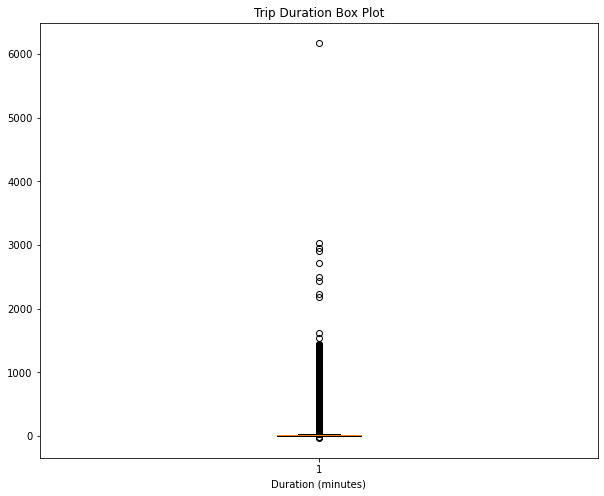

In [39]:
plt.figure(figsize=(10, 8))
plt.boxplot(x=dataset['trip_duration_minutes'])
plt.title('Trip Duration Box Plot')
plt.xlabel('Duration (minutes)')
plt.show()

In [41]:
dataset = dataset.loc[(dataset['trip_duration_minutes'] > 1) & (dataset['trip_duration_minutes'] < 4000)]

## Feature selection

in this section i decided to clean data to the trip duration which are more than 2 minutes because i checked it is not possible to travel from west village to Times Square in one minute.

In [89]:
my_dataset=dataset.copy()

In [90]:
my_dataset.shape

(2820726, 29)

In [91]:
my_dataset.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'weekdays',
       'month', 'hour_start', 'hour_end', 'trip_duration',
       'trip_duration_seconds', 'trip_duration_minutes', 'start_loc',
       'end_loc', 'days'],
      dtype='object')

Some features are not necessary, so I dropped them from the dataset. 

In [92]:
my_dataset.drop(columns=(['VendorID', 'tpep_dropoff_datetime',"trip_duration","trip_duration_seconds", "trip_duration_minutes"
       , 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee']) , inplace=True)

## Visualization Data 

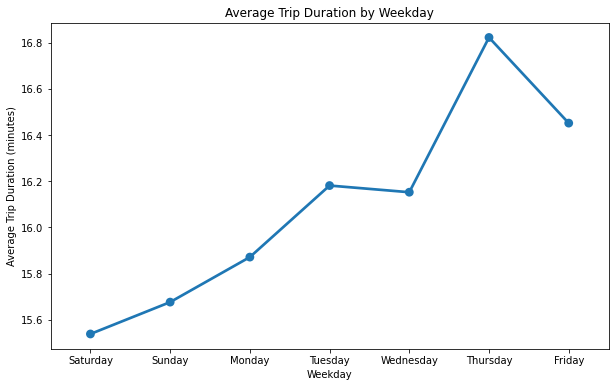

In [93]:
group_weekdays= dataset.groupby('weekdays')['trip_duration_minutes'].mean().reset_index()

weekday_order = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
plt.figure(figsize=(10, 6))
sns.pointplot(data=group_weekdays, x='weekdays', y='trip_duration_minutes', order=weekday_order)
plt.ylabel('Average Trip Duration (minutes)')
plt.xlabel('Weekday')
plt.title('Average Trip Duration by Weekday')
plt.show()

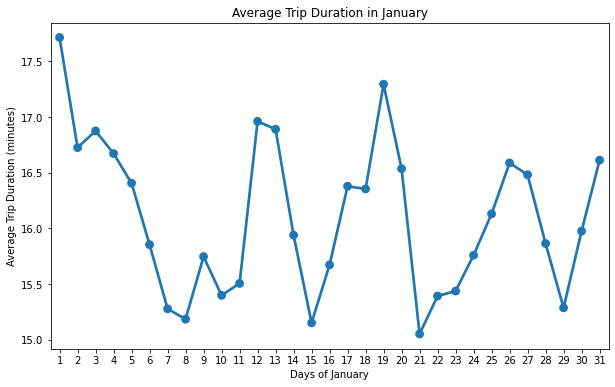

In [94]:
group_days = dataset.groupby('days')['trip_duration_minutes'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.pointplot(data=group_days, x='days', y='trip_duration_minutes')
plt.ylabel('Average Trip Duration (minutes)')
plt.xlabel('Days of January')
plt.title('Average Trip Duration in January')
plt.show()

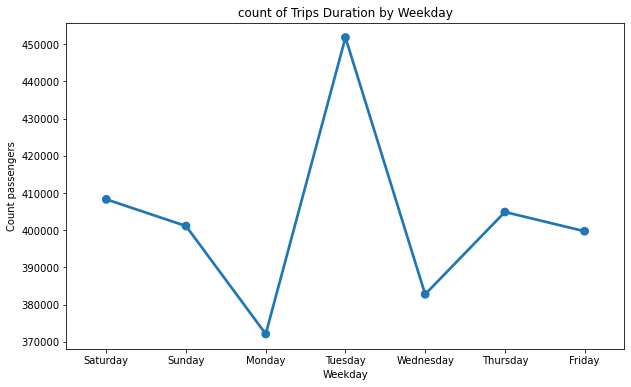

In [95]:
group_weekdays= my_dataset.groupby('weekdays')['passenger_count'].count().reset_index()

weekday_order = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
plt.figure(figsize=(10, 6))
sns.pointplot(data=group_weekdays, x='weekdays', y='passenger_count', order=weekday_order)
plt.ylabel('Count passengers')
plt.xlabel('Weekday')
plt.title('count of Trips Duration by Weekday')
plt.show()

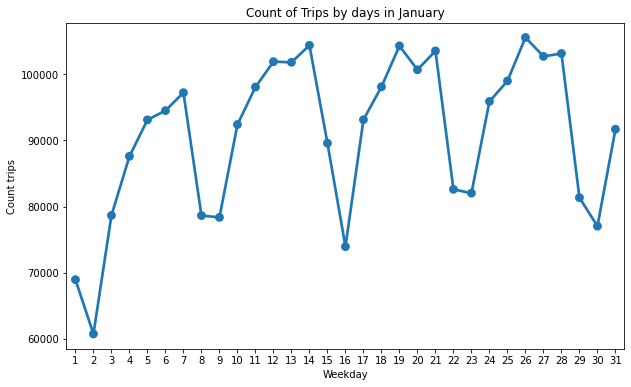

In [96]:
group_weekdays= dataset.groupby('days')['passenger_count'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=group_weekdays, x='days', y='passenger_count')
plt.ylabel('Count trips')
plt.xlabel('Weekday')
plt.title('Count of Trips by days in January')
plt.show()

<AxesSubplot:xlabel='weekdays'>

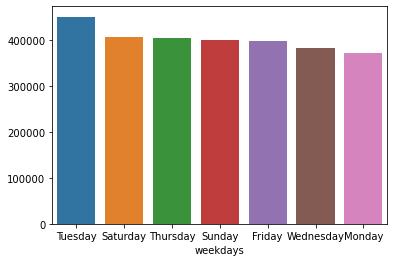

In [97]:
result=my_dataset.groupby("weekdays")["passenger_count"].count()
result_sort=result.sort_values(ascending=False)
sns.barplot(x=result_sort.index, y=result_sort.values)
#As you see most trips are on Tuesday

In [98]:
resul_location_origin=my_dataset.groupby("start_loc")["passenger_count"].count()
resul_location_origin.sort_values(ascending=False)
#  Most passengers were picked up at JFK Airport, Upper East Side South, Midtown Center and Upper East Side North. 

start_loc
JFK Airport                     151829
Upper East Side South           130762
Midtown Center                  127526
Upper East Side North           120001
Penn Station/Madison Sq West    106523
                                 ...  
Arrochar/Fort Wadsworth              2
West Brighton                        1
Rossville/Woodrow                    1
Great Kills                          1
Stapleton                            1
Name: passenger_count, Length: 251, dtype: int64

In [99]:
resul_location_destination=my_dataset.groupby("end_loc")["passenger_count"].count()
resul_location_destination_sort=resul_location_destination.sort_values(ascending=False)
resul_location_destination_sort
#Most passengers were dropped off at the Upper East Side North, Upper East Side South and Midtown Center.

end_loc
Upper East Side North                            127946
Upper East Side South                            115029
Midtown Center                                   107641
Times Sq/Theatre District                         84214
Murray Hill                                       83384
                                                  ...  
Port Richmond                                        14
Eltingville/Annadale/Prince's Bay                    14
Rossville/Woodrow                                    13
Freshkills Park                                       2
Governor's Island/Ellis Island/Liberty Island         1
Name: passenger_count, Length: 259, dtype: int64

As the graph shows the least hours are from 3 till 5 am, and then there is an upward trend and the most crowded hours for taking a taxi are around 17 and 18, and after that, it decreases.

<AxesSubplot:xlabel='hour_start'>

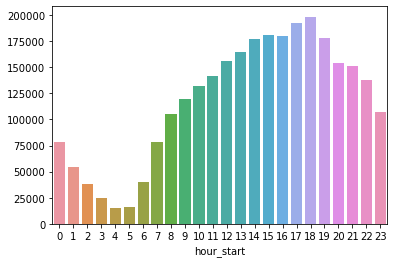

In [100]:
result=my_dataset.groupby("hour_start")["passenger_count"].count()
result_sort=result.sort_values(ascending=False)
sns.barplot(x=result_sort.index, y=result_sort.values)

In [101]:
hourly_passenger_counts = my_dataset.groupby('hour_start')['passenger_count'].count()
hour_with_most_passengers = hourly_passenger_counts.idxmax()
most_passenger_hour_data = my_dataset[my_dataset['hour_start'] == hour_with_most_passengers]
most_passenger_hour_data
# The most trips  are at 6 pm 

,tpep_pickup_datetime,passenger_count,PULocationID,weekdays,month,hour_start,hour_end,start_loc,end_loc,days
581638,2023-01-07 18:23:52,1.0,230,Saturday,1,18,18,Times Sq/Theatre District,Midtown North,7
2873361,2023-01-30 18:19:47,1.0,48,Monday,1,18,18,Clinton East,Midtown North,30
2472690,2023-01-26 18:52:46,1.0,238,Thursday,1,18,18,Upper West Side North,Upper West Side South,26
2084502,2023-01-22 18:03:13,1.0,230,Sunday,1,18,18,Times Sq/Theatre District,Clinton East,22
1767786,2023-01-19 18:51:10,1.0,237,Thursday,1,18,18,Upper East Side South,Midtown East,19
...,...,...,...,...,...,...,...,...,...,...
1872938,2023-01-20 18:41:34,1.0,236,Friday,1,18,18,Upper East Side North,Upper East Side South,20
2168680,2023-01-23 18:08:24,1.0,262,Monday,1,18,18,Yorkville East,Flushing Meadows-Corona Park,23
1063401,2023-01-12 18:57:20,1.0,68,Thursday,1,18,18,East Chelsea,Upper West Side North,12
2966381,2023-01-31 18:22:37,1.0,142,Tuesday,1,18,18,Lincoln Square East,Penn Station/Madison Sq West,31


In [102]:
most_pickup_locations = most_passenger_hour_data['start_loc'].value_counts()
most_pickup_locations=most_pickup_locations.idxmax()
most_pickup_locations
# The crowded location at 6 pm is the midtown center

'Midtown Center'

In [103]:
most_days_locations=my_dataset[my_dataset["start_loc"]==most_pickup_locations]

In [104]:
most_days_locations = most_days_locations['weekdays'].value_counts()
most_days_locations.idxmax()
# The crowded location at 6 pm is the midtown center and on Tuesday 

'Tuesday'

In [105]:
my_dataset.isnull().sum()

tpep_pickup_datetime       0
passenger_count            0
PULocationID               0
weekdays                   0
month                      0
hour_start                 0
hour_end                   0
start_loc                337
end_loc                 9529
days                       0
dtype: int64

In [106]:
my_dataset.head()

,tpep_pickup_datetime,passenger_count,PULocationID,weekdays,month,hour_start,hour_end,start_loc,end_loc,days
970805,2023-01-11 21:24:55,1.0,68,Wednesday,1,21,21,East Chelsea,West Chelsea/Hudson Yards,11
1408520,2023-01-16 00:10:22,1.0,74,Monday,1,0,0,East Harlem North,East Harlem South,16
369781,2023-01-05 16:01:01,1.0,236,Thursday,1,16,16,Upper East Side North,Yorkville West,5
2518068,2023-01-27 06:59:03,1.0,68,Friday,1,6,7,East Chelsea,Flatiron,27
2653844,2023-01-28 12:21:30,1.0,79,Saturday,1,12,12,East Village,Gramercy,28


In [107]:
my_dataset.query('start_loc.isnull()', engine='python')

,tpep_pickup_datetime,passenger_count,PULocationID,weekdays,month,hour_start,hour_end,start_loc,end_loc,days
171323,2023-01-03 13:18:11,1.0,265,Tuesday,1,13,13,NaN,NaN,3
77946,2023-01-02 07:35:02,1.0,265,Monday,1,7,7,NaN,NaN,2
2391378,2023-01-25 22:44:27,1.0,265,Wednesday,1,22,22,NaN,NaN,25
2132929,2023-01-23 12:15:11,1.0,265,Monday,1,12,12,NaN,NaN,23
2648007,2023-01-28 10:15:07,1.0,265,Saturday,1,10,10,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...
1518325,2023-01-17 11:32:02,2.0,265,Tuesday,1,11,13,NaN,Richmond Hill,17
558849,2023-01-07 14:01:46,1.0,265,Saturday,1,14,16,NaN,NaN,7
2061340,2023-01-22 14:53:55,3.0,265,Sunday,1,14,14,NaN,NaN,22
2103028,2023-01-23 00:35:22,1.0,265,Monday,1,0,0,NaN,NaN,23


In [108]:
location.tail()
# threr is not a value for 265 so we should dropna 

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [109]:
my_dataset.dropna(inplace=True)

## Data Preparation

In [120]:
group=my_dataset.groupby(["PULocationID" ,"days" ,"weekdays" ,"hour_start"])["passenger_count"].count()

In [121]:
df_grouped = group.reset_index()

In [122]:
df_grouped.shape

(63683, 5)

In [123]:
df_grouped.sort_values(by="passenger_count" , ascending= False).head(20)

,PULocationID,days,weekdays,hour_start,passenger_count
16273,79,22,Sunday,1,640
16441,79,29,Sunday,1,598
16272,79,22,Sunday,0,584
16248,79,21,Saturday,0,582
37372,161,11,Wednesday,18,580
15937,79,8,Sunday,1,576
37540,161,18,Wednesday,18,573
16249,79,21,Saturday,1,570
16416,79,28,Saturday,0,568
16417,79,28,Saturday,1,563


In [124]:
y=df_grouped["passenger_count"]

In [125]:
x=df_grouped.drop("passenger_count" , axis=1)

In [220]:
x_train , x_test , y_train, y_test=train_test_split(x , y, test_size=0.2 , random_state=42)

In [214]:
x_train.head()

,PULocationID,days,weekdays,hour_start
5754,39,21,Saturday,19
25454,125,14,Saturday,22
25194,125,3,Tuesday,15
56801,239,15,Sunday,19
52508,232,24,Tuesday,18


In [210]:
num_data=list(x_train[["PULocationID", "days" , "hour_start"]])
txt_data=list(x_train[["weekdays"]])
full_pip=ColumnTransformer([
  ("normalizer" ,   MinMaxScaler() , num_data ), 
    ("1hot" ,       OneHotEncoder()   ,    txt_data ),
])

In [211]:
x_train_prepared=full_pip.fit_transform(x_train)

In [212]:
x_train_prepared

array([[0.14448669, 0.66666667, 0.82608696, ..., 0.        , 0.        ,
        0.        ],
       [0.47148289, 0.43333333, 0.95652174, ..., 0.        , 0.        ,
        0.        ],
       [0.47148289, 0.06666667, 0.65217391, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.02281369, 0.43333333, 0.82608696, ..., 0.        , 0.        ,
        0.        ],
       [0.29657795, 0.03333333, 0.13043478, ..., 0.        , 0.        ,
        0.        ],
       [0.90114068, 0.96666667, 0.91304348, ..., 0.        , 0.        ,
        0.        ]])

# Model Selection and Evaluation

### DecisionTree

In [160]:
dtr=DecisionTreeRegressor() 
dtr.fit(x_train_prepared, y_train)
y_pred_dtr=cross_val_predict(dtr , x_train_prepared, y_train, cv=10)
dtr_rmse=np.sqrt(mean_squared_error(y_train ,y_pred_dtr))
R2_dtr=r2_score(y_train ,y_pred_dtr)
print(f"Model: {dtr.__class__.__name__}")
print(f"RMSE:{dtr_rmse}")
print(f"R2:{R2_dtr}")

Model: DecisionTreeRegressor
RMSE:18.00665723518552
R2:0.9346451732818009


### GradientBoost

In [166]:
gbr=GradientBoostingRegressor(learning_rate=0.1 , n_estimators=1000)
gbr.fit(x_train_prepared, y_train)
y_pred_gbr=cross_val_predict(gbr , x_train_prepared, y_train, cv=10)
gbr_rmse=np.sqrt(mean_squared_error(y_train ,y_pred_gbr))
R2_gbr=r2_score(y_train ,y_pred_gbr)
print(f"Model: {gbr.__class__.__name__}")
print(f"RMSE:{gbr_rmse}")
print(f"R2:{R2_gbr}")

Model: GradientBoostingRegressor
RMSE:43.04443888966684
R2:0.6265387263535175


### XGBoost

In [197]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
xgb = xgb.XGBRegressor(n_estimators=1000)
xgb.fit(x_train_prepared, y_train)
y_pred_xgb=cross_val_predict(xgb , x_train_prepared, y_train, cv=10)
xgb_rmse=np.sqrt(mean_squared_error(y_train ,y_pred_xgb))
R2_xgb=r2_score(y_train ,y_pred_xgb)
print(f"Model: {xgb.__class__.__name__}")
print(f"RMSE:{xgb_rmse}")
print(f"R2:{R2_xgb}")

Model: XGBRegressor
RMSE:13.39596141687362
R2:0.9638291055591227


### Feature Importance

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature Importance', ylabel='Features'>

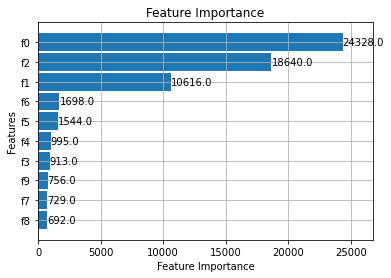

In [179]:
plot_importance(xgb, height=0.9, importance_type='weight', xlabel='Feature Importance', title='Feature Importance')

In [198]:
xgb.get_booster().get_score(importance_type='weight')

{'f0': 24328.0,
 'f1': 10616.0,
 'f2': 18640.0,
 'f3': 913.0,
 'f4': 995.0,
 'f5': 1544.0,
 'f6': 1698.0,
 'f7': 729.0,
 'f8': 692.0,
 'f9': 756.0}

In [207]:
xgb.get_booster().feature_names = list(full_pip.get_feature_names_out())
xgb.get_booster().feature_names 

['normalizer__PULocationID',
 'normalizer__days',
 'normalizer__hour_start',
 '1hot__weekdays_Friday',
 '1hot__weekdays_Monday',
 '1hot__weekdays_Saturday',
 '1hot__weekdays_Sunday',
 '1hot__weekdays_Thursday',
 '1hot__weekdays_Tuesday',
 '1hot__weekdays_Wednesday']

# Evaluation

In [218]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
def evaluation(model):
    print("RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
    print("MAE:" , mean_absolute_error(y_test, model.predict(x_test)))
    print("R2:", r2_score(y_test, model.predict(x_test)))

In [221]:
x_test=full_pip.transform(x_test)

In [222]:
evaluation(xgb)

RMSE: 13.172305598577466
MAE: 7.453351411430616
R2: 0.9634152160156193


In [223]:
y_pred=xgb.predict(x_test)

### Scatter Plot

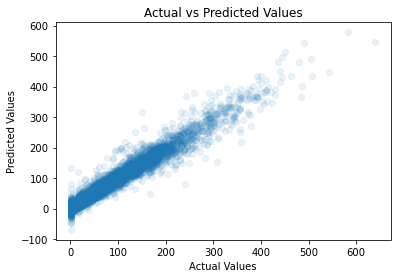

In [230]:
plt.scatter(y_test, y_pred, alpha=0.09)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()